## Contents
- [Imports](#Data-Dictionary)
- [Regression Modeling Race](#Regression-Modeling-Race)  

# Imports

In [49]:
# Import the required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings('ignore')

In [50]:
# Import the Texas data and sae to a dataframe.
df = pd.read_csv('../data/cleaned_numbers_five_states.csv')

In [51]:
# Display the first few rows of the dataframe.
df.head(3)

county_state  total_cases  total_fatalities  \
0    Santa Clara County, California      23978.0             388.0   
1      San Mateo County, California      10942.0             159.0   
2  Santa Barbara County, California       9781.0             120.0   

   death_rate  total_tests  race_pop  race_pop_hispanic_or_latino_of_any_race  \
0    0.016181       839764   1922200                                   495455   
1    0.014531       285657    765935                                   189002   
2    0.012269       158693    443738                                   200060   

   race_pop_white_alone  race_pop_black_or_african_american_alone  \
0                615912                                     45379   
1                303047                                     16838   
2                199356                                      7881   

   race_pop_american_indian_and_alaska_native_alone  ...  \
0                                              3003  ...   
1                                              1151  ...   
2                                              1407  ...   

   inc_med_hhld_inc_dol  inc_mean_hhld_inc_dol  inc_per_capita_inc_dol  \
0                116178                 154183                   52451   
1                113776                 162639                   57375   
2                 71657                 101100                   34229   

   inc_med_earn_workers_dol  inc_med_earn_male_full_yr_workers_dol  \
0                     52592                                  90862   
1                     51601                                  79347   
2                     28250                                  48314   

   inc_med_earn_female_full_yr_workers_dol  deaths_per_100_cases  \
0                                    64739              1.618150   
1                                    65524              1.453116   
2                                    41964              1.226868   

   cases_per_100_people  tests_per_100_people  pop_density  
0              1.247425             43.687650  1488.824137  
1              1.428581             37.295201  1707.252650  
2              2.204229             35.762770   162.235996  

[3 rows x 59 columns]

In [52]:
# Set the county name to the index.
df = df.set_index('county_state')

# Regression Modeling Income

In [53]:
list(df.columns)

['total_cases',
 'total_fatalities',
 'death_rate',
 'total_tests',
 'race_pop',
 'race_pop_hispanic_or_latino_of_any_race',
 'race_pop_white_alone',
 'race_pop_black_or_african_american_alone',
 'race_pop_american_indian_and_alaska_native_alone',
 'race_pop_asian_alone',
 'race_pop_native_hawaiian_and_other_pacific_islander_alone',
 'race_pop_some_other_race_alone',
 'race_pop_two_or_more_races',
 'sex_age_pop',
 'sex_age_pop_male',
 'sex_age_pop_female',
 'sex_age_pop_under_5',
 'sex_age_pop_5_to_9',
 'sex_age_pop_10_to_14',
 'sex_age_pop_15_to_19',
 'sex_age_pop_20_to_24',
 'sex_age_pop_25_to_34',
 'sex_age_pop_35_to_44',
 'sex_age_pop_45_to_54',
 'sex_age_pop_55_to_59',
 'sex_age_pop_60_to_64',
 'sex_age_pop_65_to_74',
 'sex_age_pop_75_to_84',
 'sex_age_pop_85_and_over',
 'sex_age_median_age_in_years',
 'sq_mi',
 'obes_percent',
 'health_ins_noninst_pop',
 'health_ins_noninst_pop_cov_yes',
 'health_ins_noninst_pop_private',
 'health_ins_noninst_pop_public',
 'health_ins_noninst_pop

In [58]:
df['covid_severity'] = 0

In [61]:
mask1 = df['cases_per_100_people'] < 2
mask2 = (df['cases_per_100_people'] >= 2) & (df['cases_per_100_people'] < 4)
mask3 = df['cases_per_100_people'] >= 4

In [62]:
df['covid_severity'][mask1] = 1

In [63]:
df['covid_severity'][mask2] = 2

In [64]:
df['covid_severity'][mask3] = 3

In [65]:
df['covid_severity'].value_counts()

2    239
1    228
3     76
Name: covid_severity, dtype: int64

In [ ]:
df['covid_severity'][]

In [66]:
# Create a subset of demographic columns for modeling.
# Extract columns for model.
inc_mod_cols = [
    'inc_hhlds',
    'inc_hhlds_less_than_10_000',
    'inc_hhlds_10_000_to_14_999',
    'inc_hhlds_15_000_to_24_999',
    'inc_hhlds_25_000_to_34_999',
    'inc_hhlds_35_000_to_49_999',
    'inc_hhlds_50_000_to_74_999',
    'inc_hhlds_75_000_to_99_999',
    'inc_hhlds_100_000_to_149_999',
    'inc_hhlds_150_000_to_199_999',
    'inc_hhlds_200_000_or_more',
    'inc_med_hhld_inc_dol',
    'inc_mean_hhld_inc_dol',
    'inc_per_capita_inc_dol',
    'inc_med_earn_workers_dol',
    'inc_med_earn_male_full_yr_workers_dol',
    'inc_med_earn_female_full_yr_workers_dol',
    'cases_per_100_people',
    'pop_density',
    'covid_severity'
]

In [67]:
# Create a dataframe
df_inc = df[inc_mod_cols]

### Reg Model: All Households

In [68]:
# Define a function to create new columns with percentages.
def to_percentage(dataframe):
    
    for column in dataframe.columns:
 
        if column.startswith('inc_hhlds_'):
            dataframe['percent_' + column] = dataframe[column] / dataframe['inc_hhlds']
    
    return

In [69]:
# Apply the function to the numbers dataframe
to_percentage(df_inc)

In [70]:
list(df_inc.columns)

['inc_hhlds',
 'inc_hhlds_less_than_10_000',
 'inc_hhlds_10_000_to_14_999',
 'inc_hhlds_15_000_to_24_999',
 'inc_hhlds_25_000_to_34_999',
 'inc_hhlds_35_000_to_49_999',
 'inc_hhlds_50_000_to_74_999',
 'inc_hhlds_75_000_to_99_999',
 'inc_hhlds_100_000_to_149_999',
 'inc_hhlds_150_000_to_199_999',
 'inc_hhlds_200_000_or_more',
 'inc_med_hhld_inc_dol',
 'inc_mean_hhld_inc_dol',
 'inc_per_capita_inc_dol',
 'inc_med_earn_workers_dol',
 'inc_med_earn_male_full_yr_workers_dol',
 'inc_med_earn_female_full_yr_workers_dol',
 'cases_per_100_people',
 'pop_density',
 'covid_severity',
 'percent_inc_hhlds_less_than_10_000',
 'percent_inc_hhlds_10_000_to_14_999',
 'percent_inc_hhlds_15_000_to_24_999',
 'percent_inc_hhlds_25_000_to_34_999',
 'percent_inc_hhlds_35_000_to_49_999',
 'percent_inc_hhlds_50_000_to_74_999',
 'percent_inc_hhlds_75_000_to_99_999',
 'percent_inc_hhlds_100_000_to_149_999',
 'percent_inc_hhlds_150_000_to_199_999',
 'percent_inc_hhlds_200_000_or_more']

In [71]:
X = df_inc[[
    'percent_inc_hhlds_less_than_10_000',
    'percent_inc_hhlds_10_000_to_14_999',
    'percent_inc_hhlds_15_000_to_24_999',
    'percent_inc_hhlds_25_000_to_34_999',
    'percent_inc_hhlds_35_000_to_49_999',
    'percent_inc_hhlds_50_000_to_74_999',
    'percent_inc_hhlds_75_000_to_99_999',
    'percent_inc_hhlds_100_000_to_149_999',
    'percent_inc_hhlds_150_000_to_199_999',
    'percent_inc_hhlds_200_000_or_more'
]]

y = df_inc['covid_severity']

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

In [72]:
ss = StandardScaler()
X_train_ss = ss.fit_transform(X_train)
X_test_ss = ss.transform(X_test)

In [73]:
lr = LinearRegression()
lr.fit(X_train_ss, y_train)

LinearRegression()

In [74]:
X_train.shape, y_test.shape

((407, 10), (136,))

In [75]:
cross_val_score(lr, X_test_ss, y_test, cv=5).mean()

-0.13170908950971422

### Reg Model: Under 25, 25-50, 50-75, 75-100, 100-150, 150-199, 200+

In [16]:
df_inc['inc_hhlds_less_than_25_000'] = df_inc['inc_hhlds_less_than_10_000'] \
                        + df_inc['inc_hhlds_10_000_to_14_999'] + df_inc['inc_hhlds_15_000_to_24_999']

df_inc['inc_hhlds_25_000_to_49_999'] = df_inc['inc_hhlds_25_000_to_34_999'] \
                        + df_inc['inc_hhlds_35_000_to_49_999']

In [17]:
# Define a function to create new columns with percentages.
def to_percentage(dataframe):
    for column in dataframe.columns:
        if column.startswith('inc_hhlds_'):
            dataframe['percent_' + column] = dataframe[column] / dataframe['inc_hhlds']
    return

In [18]:
# Apply the function to the numbers dataframe
to_percentage(df_inc)

In [19]:
list(df_inc.columns)

['inc_hhlds',
 'inc_hhlds_less_than_10_000',
 'inc_hhlds_10_000_to_14_999',
 'inc_hhlds_15_000_to_24_999',
 'inc_hhlds_25_000_to_34_999',
 'inc_hhlds_35_000_to_49_999',
 'inc_hhlds_50_000_to_74_999',
 'inc_hhlds_75_000_to_99_999',
 'inc_hhlds_100_000_to_149_999',
 'inc_hhlds_150_000_to_199_999',
 'inc_hhlds_200_000_or_more',
 'inc_med_hhld_inc_dol',
 'inc_mean_hhld_inc_dol',
 'inc_per_capita_inc_dol',
 'inc_med_earn_workers_dol',
 'inc_med_earn_male_full_yr_workers_dol',
 'inc_med_earn_female_full_yr_workers_dol',
 'cases_per_100_people',
 'pop_density',
 'percent_inc_hhlds_less_than_10_000',
 'percent_inc_hhlds_10_000_to_14_999',
 'percent_inc_hhlds_15_000_to_24_999',
 'percent_inc_hhlds_25_000_to_34_999',
 'percent_inc_hhlds_35_000_to_49_999',
 'percent_inc_hhlds_50_000_to_74_999',
 'percent_inc_hhlds_75_000_to_99_999',
 'percent_inc_hhlds_100_000_to_149_999',
 'percent_inc_hhlds_150_000_to_199_999',
 'percent_inc_hhlds_200_000_or_more',
 'inc_hhlds_less_than_25_000',
 'inc_hhlds_25_

In [23]:
X = df_inc[[
    'percent_inc_hhlds_less_than_25_000',
    'percent_inc_hhlds_25_000_to_49_999',
    'percent_inc_hhlds_50_000_to_74_999',
    'percent_inc_hhlds_75_000_to_99_999',
    'percent_inc_hhlds_100_000_to_149_999',
    'percent_inc_hhlds_150_000_to_199_999',
    'percent_inc_hhlds_200_000_or_more'
]]

y = df_inc['cases_per_100_people']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [24]:
ss = StandardScaler()
X_train_ss = ss.fit_transform(X_train)
X_test_ss = ss.transform(X_test)

In [25]:
lr = LinearRegression()
lr.fit(X_train_ss, y_train)

LinearRegression()

In [26]:
X_train.shape, y_test.shape

((407, 7), (136,))

In [27]:
cross_val_score(lr, X_test_ss, y_test, cv=5).mean()

-0.04975908113836038

### Reg Model: Under 50, 50-100, 100+

In [36]:
df_inc['inc_hhlds_less_than_49_999'] = df_inc['inc_hhlds_less_than_10_000'] \
                        + df_inc['inc_hhlds_10_000_to_14_999'] + df_inc['inc_hhlds_15_000_to_24_999']\
                        + df_inc['inc_hhlds_25_000_to_34_999'] + df_inc['inc_hhlds_35_000_to_49_999']\

df_inc['inc_hhlds_50_000_to_99_999'] = df_inc['inc_hhlds_50_000_to_74_999'] + df_inc['inc_hhlds_75_000_to_99_999']

df_inc['inc_hhlds_100_000_or_more'] = df_inc['inc_hhlds_100_000_to_149_999'] \
                        + df_inc['inc_hhlds_150_000_to_199_999']

In [37]:
# Define a function to create new columns with percentages.
def to_percentage(dataframe):
    for column in dataframe.columns:
        if column.startswith('inc_hhlds_'):
            dataframe['percent_' + column] = dataframe[column] / dataframe['inc_hhlds']
    return

In [38]:
# Apply the function to the numbers dataframe
to_percentage(df_inc)

In [39]:
list(df_inc.columns)

['inc_hhlds',
 'inc_hhlds_less_than_10_000',
 'inc_hhlds_10_000_to_14_999',
 'inc_hhlds_15_000_to_24_999',
 'inc_hhlds_25_000_to_34_999',
 'inc_hhlds_35_000_to_49_999',
 'inc_hhlds_50_000_to_74_999',
 'inc_hhlds_75_000_to_99_999',
 'inc_hhlds_100_000_to_149_999',
 'inc_hhlds_150_000_to_199_999',
 'inc_hhlds_200_000_or_more',
 'inc_med_hhld_inc_dol',
 'inc_mean_hhld_inc_dol',
 'inc_per_capita_inc_dol',
 'inc_med_earn_workers_dol',
 'inc_med_earn_male_full_yr_workers_dol',
 'inc_med_earn_female_full_yr_workers_dol',
 'cases_per_100_people',
 'pop_density',
 'percent_inc_hhlds_less_than_10_000',
 'percent_inc_hhlds_10_000_to_14_999',
 'percent_inc_hhlds_15_000_to_24_999',
 'percent_inc_hhlds_25_000_to_34_999',
 'percent_inc_hhlds_35_000_to_49_999',
 'percent_inc_hhlds_50_000_to_74_999',
 'percent_inc_hhlds_75_000_to_99_999',
 'percent_inc_hhlds_100_000_to_149_999',
 'percent_inc_hhlds_150_000_to_199_999',
 'percent_inc_hhlds_200_000_or_more',
 'inc_hhlds_less_than_25_000',
 'inc_hhlds_25_

In [40]:
X = df_inc[[
    'percent_inc_hhlds_less_than_49_999',
    'percent_inc_hhlds_50_000_to_99_999',
    'percent_inc_hhlds_100_000_or_more'
]]

y = df_inc['cases_per_100_people']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [41]:
ss = StandardScaler()
X_train_ss = ss.fit_transform(X_train)
X_test_ss = ss.transform(X_test)

In [42]:
lr = LinearRegression()
lr.fit(X_train_ss, y_train)

LinearRegression()

In [43]:
X_train.shape, y_test.shape

((407, 3), (136,))

In [44]:
cross_val_score(lr, X_test_ss, y_test, cv=5).mean()

0.026749790424399

### Reg Model: Under 100, 100+

In [45]:
df_inc['inc_hhlds_less_than_99_999'] = df_inc['inc_hhlds_less_than_10_000'] \
                        + df_inc['inc_hhlds_10_000_to_14_999'] + df_inc['inc_hhlds_15_000_to_24_999']\
                        + df_inc['inc_hhlds_25_000_to_34_999'] + df_inc['inc_hhlds_35_000_to_49_999']\
                        + df_inc['inc_hhlds_50_000_to_74_999'] + df_inc['inc_hhlds_75_000_to_99_999']\

df_inc['inc_hhlds_100_000_or_more'] = df_inc['inc_hhlds_100_000_to_149_999'] \
                        + df_inc['inc_hhlds_150_000_to_199_999']

In [46]:
# Define a function to create new columns with percentages.
def to_percentage(dataframe):
    for column in dataframe.columns:
        if column.startswith('inc_hhlds_'):
            dataframe['percent_' + column] = dataframe[column] / dataframe['inc_hhlds']
    return

In [47]:
# Apply the function to the numbers dataframe
to_percentage(df_inc)

In [48]:
list(df_inc.columns)

['inc_hhlds',
 'inc_hhlds_less_than_10_000',
 'inc_hhlds_10_000_to_14_999',
 'inc_hhlds_15_000_to_24_999',
 'inc_hhlds_25_000_to_34_999',
 'inc_hhlds_35_000_to_49_999',
 'inc_hhlds_50_000_to_74_999',
 'inc_hhlds_75_000_to_99_999',
 'inc_hhlds_100_000_to_149_999',
 'inc_hhlds_150_000_to_199_999',
 'inc_hhlds_200_000_or_more',
 'inc_med_hhld_inc_dol',
 'inc_mean_hhld_inc_dol',
 'inc_per_capita_inc_dol',
 'inc_med_earn_workers_dol',
 'inc_med_earn_male_full_yr_workers_dol',
 'inc_med_earn_female_full_yr_workers_dol',
 'cases_per_100_people',
 'pop_density',
 'percent_inc_hhlds_less_than_10_000',
 'percent_inc_hhlds_10_000_to_14_999',
 'percent_inc_hhlds_15_000_to_24_999',
 'percent_inc_hhlds_25_000_to_34_999',
 'percent_inc_hhlds_35_000_to_49_999',
 'percent_inc_hhlds_50_000_to_74_999',
 'percent_inc_hhlds_75_000_to_99_999',
 'percent_inc_hhlds_100_000_to_149_999',
 'percent_inc_hhlds_150_000_to_199_999',
 'percent_inc_hhlds_200_000_or_more',
 'inc_hhlds_less_than_25_000',
 'inc_hhlds_25_

In [49]:
X = df_inc[[
    'percent_inc_hhlds_less_than_99_999',
    'percent_inc_hhlds_100_000_or_more',
]]

y = df_inc['cases_per_100_people']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [50]:
ss = StandardScaler()
X_train_ss = ss.fit_transform(X_train)
X_test_ss = ss.transform(X_test)

In [51]:
lr = LinearRegression()
lr.fit(X_train_ss, y_train)

LinearRegression()

In [52]:
X_train.shape, y_test.shape

((407, 2), (136,))

In [53]:
cross_val_score(lr, X_test_ss, y_test, cv=5).mean()

0.0010283519704732847

# Correlations income

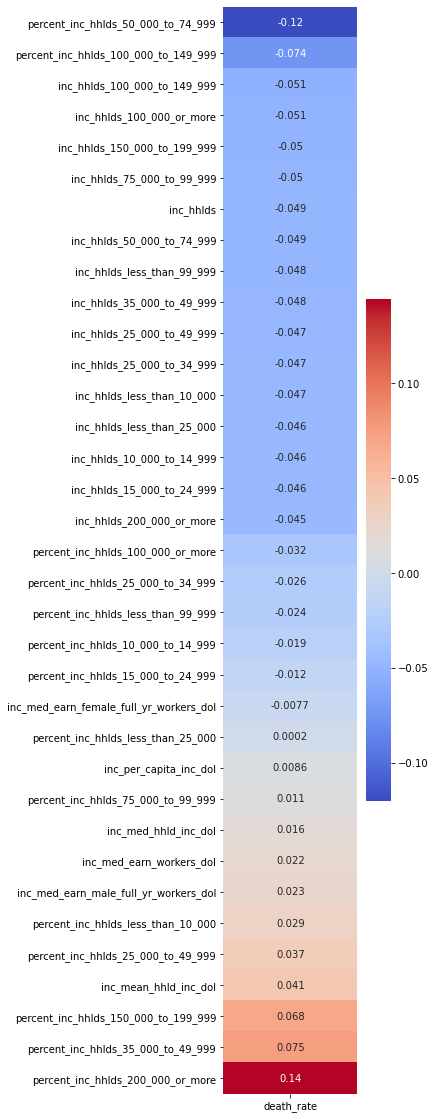

In [50]:
# Visualize the correlation between the variables.
# Save a correlation table to a variable.
corr = tx_inc.corr()

# Display a correlation chart just for Sale Price.
plt.figure(figsize=(3, 20))
sns.heatmap(corr[['death_rate']].sort_values(by='death_rate').iloc[:-1], annot=True, cmap = 'coolwarm');